##   Programming Assignment # 4 Clustering

- Student Name :- Mehul Deorao Ganjude
- Student Id:- 1001990551
- Net Id :- mdg0551



### Rules
1. Work is to be done in a team
2. Any cheating including plagiarism, cooperation will be reported to the corresponding UTA’ s instance.
3. If using any resource (books, internet), please make sure that you cite it.
4. Follow the given structure. Specifically, place all your tasks in THIS NOTEBOOK BUT IN SEPARATE BLOCKS. Then save this notebook as 'yourNetID_pa4.ipynb' and submit it. 
5. Do not alter the dataset name.
6. Please dont ask any details specific to the project like "How to plot XYZ ? What parameters are to be used? " and so on..
7. Report is not required for this assignment.If you want to document a function or a process, just comment or use markup cell.
8. Please dont send images of your visualizations to verify whether they are right or not before submission deadline.
9. Only Seaborn,numpy,pandas,sklearn,matplotlib packages will be allowed. Failing to abide will lead to a **-10 decrement in your scores.**
10. All visualizations (including scatter plots) should have at least 4-5 meaningful lines explaining about it. Failure to do so, will lead to reduction in marks.



### Assignment Details
The purpose of this assignment is to cluster using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.
You have 3 dataset files . You need to submit this ipython file after renaming it. Preprocessing will be needed for the data as most of the data is in string and needs to be quantified.

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Required Python Packages

In [2]:
#Seaborn,numpy,pandas,sklearn,matplotlib only
#Here we imported all required libraries required for displaying the output and graphs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder 

%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [3]:
#pre-processing.
#reading the input file from the system
dataset = pd.read_csv('clusteringdata.csv')

In [4]:
dataset

,Age,WorkClass,Fnlwght,Education,EducationNumber,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,43,Private,222971,5th-6th,3,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,Mexico,<=50K
4996,31,Private,259425,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
4997,47,Self-emp-inc,212120,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
4998,26,Private,245880,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,60,United-States,<=50K


In [5]:
dataset.head()

,Age,WorkClass,Fnlwght,Education,EducationNumber,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
#Looking for null values
#Null values have to be discarded in the pre-processing stage
dataset.isna().sum()

Age                0
WorkClass          0
Fnlwght            0
Education          0
EducationNumber    0
MaritalStatus      0
Occupation         0
Relationship       0
Race               0
Sex                0
CapitalGain        0
CapitalLoss        0
HoursPerWeek       0
NativeCountry      0
Class              0
dtype: int64

In [7]:
le = LabelEncoder()
Class = le.fit_transform(dataset.Class)
dataset["Class"]=Class
NativeCountry = le.fit_transform(dataset.NativeCountry)
dataset["NativeCountry"]=NativeCountry
Sex= le.fit_transform(dataset.Sex)
dataset["Sex"]=Sex
Race= le.fit_transform(dataset.Race)
dataset["Race"]=Race
Relationship= le.fit_transform(dataset.Relationship)
dataset["Relationship"]=Relationship
Occupation= le.fit_transform(dataset.Occupation)
dataset["Occupation"]=Occupation
Education= le.fit_transform(dataset.Education)
dataset["Education"]=Education
WorkClass= le.fit_transform(dataset.WorkClass)
dataset["WorkClass"]=WorkClass
MaritalStatus= le.fit_transform(dataset.MaritalStatus)
dataset["MaritalStatus"]=MaritalStatus

### TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method
In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.
We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method.
The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.
For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

Error = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

From the above diagram we have plotted no. of clusters on x-axis and sum of squares within-cluster on the y-axis

To find the best number of clusters, we must choose the value of k at the "elbow" or the point at which the line 
graph begins to decrease linearly.

Hence, we can conclude that the optimal value for k should be 3.


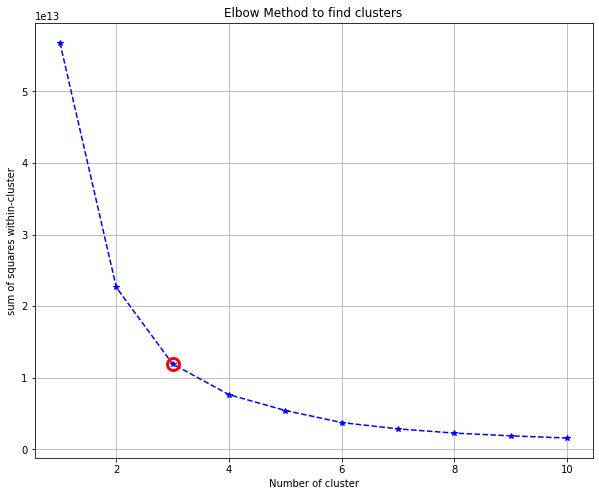

In [8]:
#########################begin code for Task 1-a
import matplotlib.pyplot as plt
SSE = {}
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(dataset)
    SSE[k] = kmeans.inertia_ 
plt.figure(figsize=(10,8))
plt.plot(list(SSE.keys()), list(SSE.values()), '--b*')
plt.title('Elbow Method to find clusters')
plt.xlabel("Number of cluster")
plt.ylabel('sum of squares within-cluster')
plt.plot(3,SSE[3],marker='o', markersize=12, 
    markeredgewidth=3, markeredgecolor='r', markerfacecolor='None')
plt.grid('True')
print("Error = {}".format([round(sse,2) for sse in SSE]))

print("\nFrom the above diagram we have plotted no. of clusters on x-axis and sum of squares within-cluster on the y-axis") 
print("\nTo find the best number of clusters, we must choose the value of k at the \"elbow\" or the point at which the line \ngraph begins to decrease linearly.")
print("\nHence, we can conclude that the optimal value for k should be 3.")
#########################begin code for Task 1-a


### Task 1-b: Visualization for K-Means Clustering
In this task, you will be performing k-means clustering for k=2,3,4 and visualize the predicted training samples and actual training samples on scatter plots. Use 80% of the dataset for training and 20% of the dataset for testing. Perform kmeans for clustering samples in your training set.
Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.
Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.

In [9]:
###################begin code for Task 1-b-1: Split the datasetand set the random_state as 2021 without fail testing

### Important!!!
X_train = dataset.sample(frac=0.80, random_state=2021)
X_test = dataset.drop(X_train.index)
y_train = X_train.pop('Class')
y_test = X_test.pop('Class')
###################end code for Task 1-b-1

### Visualizing using K=2

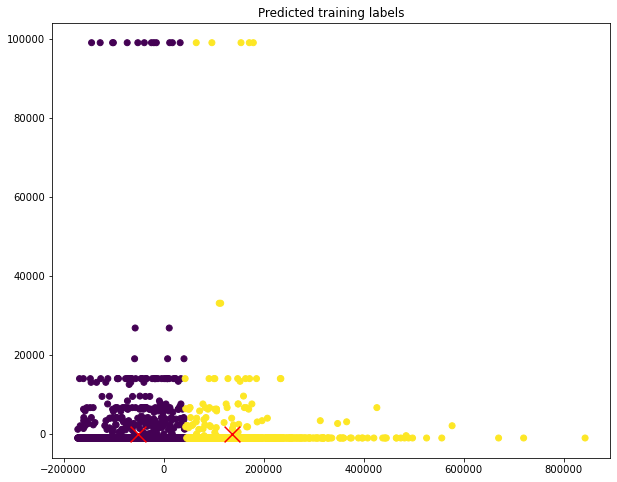

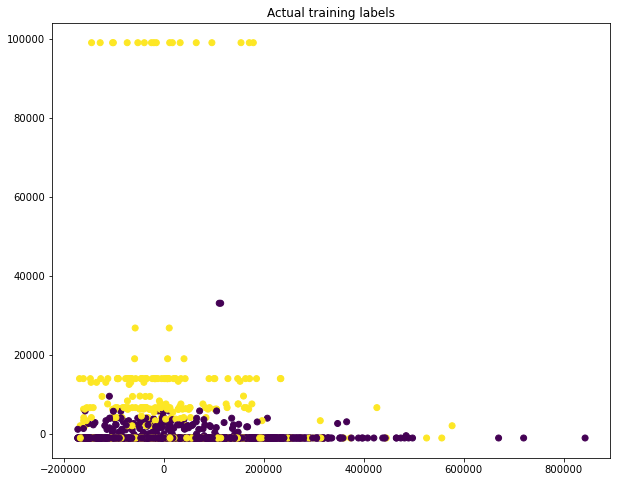

Applying pca for 2 components using the dataset and choosing k = 2 
we get the above scatter plots where cluster centers are computed for Predicted Training Labels


In [10]:

###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels
# Import PCA
from sklearn.decomposition import PCA


# Create the KMeans model
kmeans = KMeans(n_clusters=2, random_state=2021).fit(X_train)

# Compute cluster centers and predict cluster index for each sample 
index=kmeans.predict(X_train)

# Model and fit the data to the PCA model
X_train_pca = PCA(n_components=2).fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]

y_Train_Pred= kmeans.fit_predict(X_train_pca)

plt.figure(figsize=(10,8))
plt.title("Predicted training labels")
plt.scatter(x,y,c=index)
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=250, marker='x',
            c='red',
            label='centroids')


plt.show()
plt.figure(figsize=(10,8))
plt.title("Actual training labels")
plt.scatter(x,y,c=y_train)
plt.show()

print("Applying pca for 2 components using the dataset and choosing k = 2 \nwe get the above scatter plots where cluster centers are computed for Predicted Training Labels")

###################end code for Task 1-b-2

#### Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

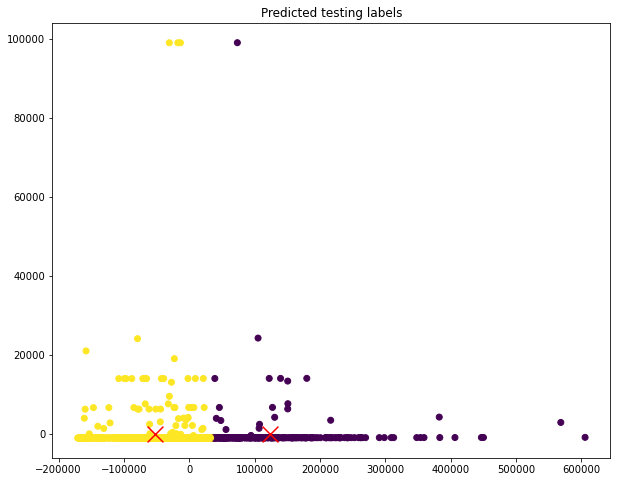

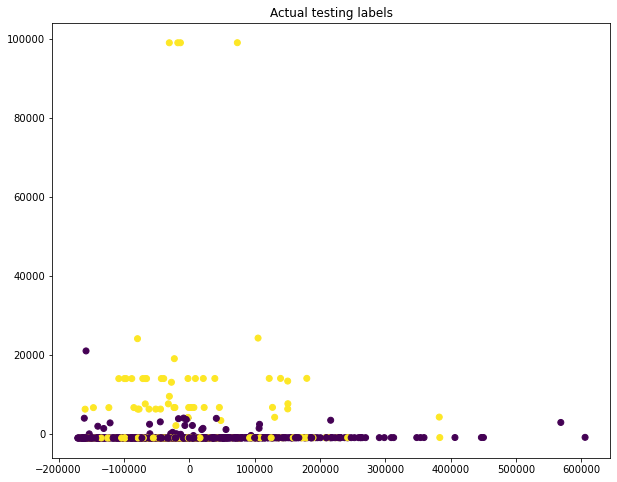

Using the Trained Model from the previous step, 

Applying pca for 2 components using the dataset and choosing k = 2 
we get the above scatter plots where cluster centers are computed for 
Predicted Testing Labels


In [11]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels
kmeans = KMeans(n_clusters=2, random_state=2021).fit(X_test)

# predict cluster index for each sample 
index1=kmeans.predict(X_test)

# Model and fit the data to the PCA model
X_test_pca = PCA(n_components=2).fit_transform(X_test)

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]

y_Train_Pred= kmeans.fit_predict(X_test_pca)


plt.figure(figsize=(10,8))
plt.title("Predicted testing labels")
plt.scatter(x,y,c=index1)

plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=250, marker='x',
            c='red',
            label='centroids')

plt.show()
plt.figure(figsize=(10,8))
plt.title("Actual testing labels")
plt.scatter(x,y,c=y_test)

plt.show()

print("Using the Trained Model from the previous step, \n")
print("Applying pca for 2 components using the dataset and choosing k = 2 \nwe get the above scatter plots where cluster centers are computed for \nPredicted Testing Labels")


###################end code for Task 1-b-3

In [12]:
###################begin code for  Print out a confusion matrix
print("Confusion matrix for training data \n",confusion_matrix(y_train,index))
print("Confusion matrix for Testing data \n",confusion_matrix(y_test,index1))

###################end code 

Confusion matrix for training data 
 [[2191  848]
 [ 723  238]]
Confusion matrix for Testing data 
 [[237 503]
 [ 60 200]]


### Visualizing using K=3

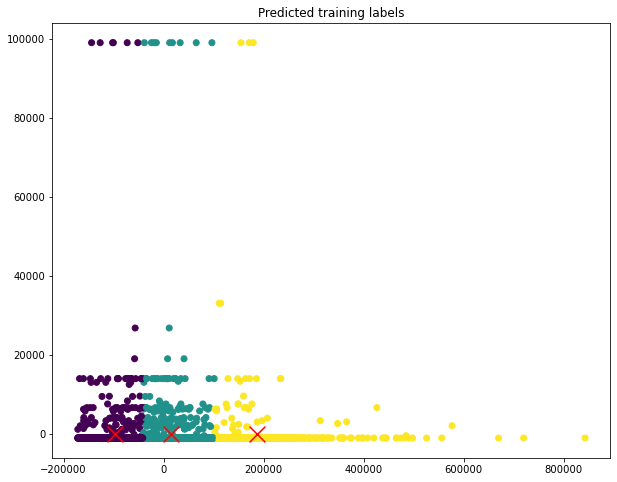

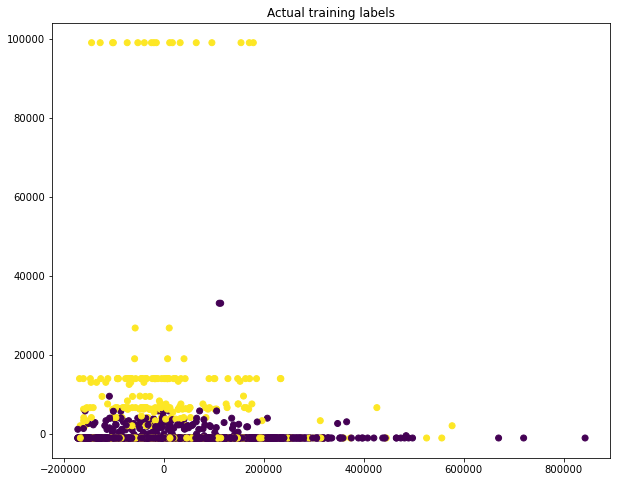

Applying pca for 3 components using the dataset and choosing k = 3 
we get the above scatter plots where cluster centers are computed for Predicted Training Labels


In [13]:

###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels
# Import PCA
from sklearn.decomposition import PCA


# Create the KMeans model
kmeans = KMeans(n_clusters=3, random_state=2021).fit(X_train)

# Compute cluster centers and predict cluster index for each sample 
index=kmeans.predict(X_train)

# Model and fit the data to the PCA model
X_train_pca = PCA(n_components=3).fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]

y_Train_Pred= kmeans.fit_predict(X_train_pca)

plt.figure(figsize=(10,8))
plt.title("Predicted training labels")
plt.scatter(x,y,c=index)


plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=250, marker='x',
            c='red',
            label='centroids')

plt.show()
plt.figure(figsize=(10,8))
plt.title("Actual training labels")
plt.scatter(x,y,c=y_train)

plt.show()

print("Applying pca for 3 components using the dataset and choosing k = 3 \nwe get the above scatter plots where cluster centers are computed for Predicted Training Labels")

###################end code for Task 1-b-2


##### Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

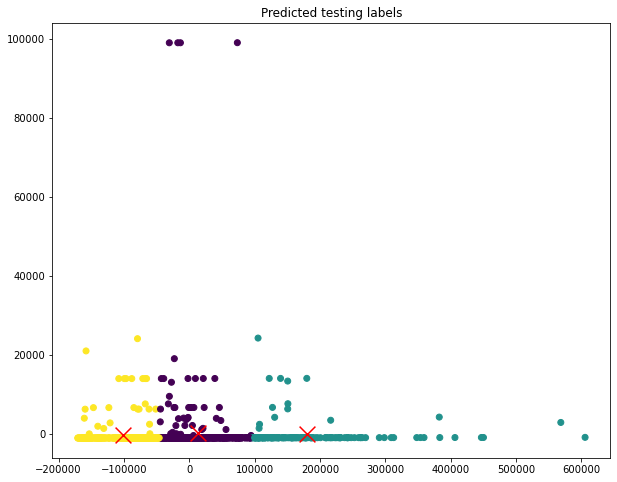

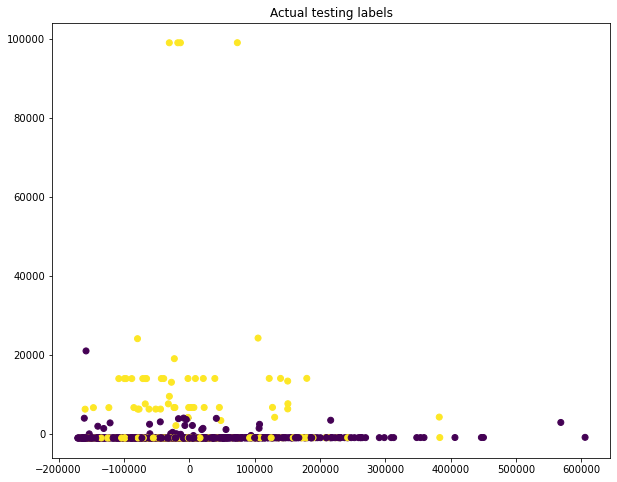

Using the Trained Model from the previous step, 

Applying pca for 3 components using the dataset and choosing k = 3 
we get the above scatter plots where cluster centers are computed for 
Predicted Testing Labels


In [14]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels
kmeans = KMeans(n_clusters=3, random_state=2021).fit(X_test)

# predict cluster index for each sample 
index1=kmeans.predict(X_test)

# Model and fit the data to the PCA model
X_test_pca = PCA(n_components=3).fit_transform(X_test)

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]

y_Train_Pred= kmeans.fit_predict(X_test_pca)


plt.figure(figsize=(10,8))
plt.title("Predicted testing labels")
plt.scatter(x,y,c=index1)


plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=250, marker='x',
            c='red',
            label='centroids')

plt.show()
plt.figure(figsize=(10,8))
plt.title("Actual testing labels")
plt.scatter(x,y,c=y_test)

plt.show()

print("Using the Trained Model from the previous step, \n")
print("Applying pca for 3 components using the dataset and choosing k = 3 \nwe get the above scatter plots where cluster centers are computed for \nPredicted Testing Labels")

###################end code for Task 1-b-3

In [15]:
###################begin code for  Print out a confusion matrix
print("Confusion matrix for training data \n",confusion_matrix(y_train,index))
print("Confusion matrix for Testing data \n",confusion_matrix(y_test,index1))

###################end code 

Confusion matrix for training data 
 [[1121 1434  484]
 [ 363  464  134]
 [   0    0    0]]
Confusion matrix for Testing data 
 [[378 120 242]
 [128  36  96]
 [  0   0   0]]


### Visualizing using K=4

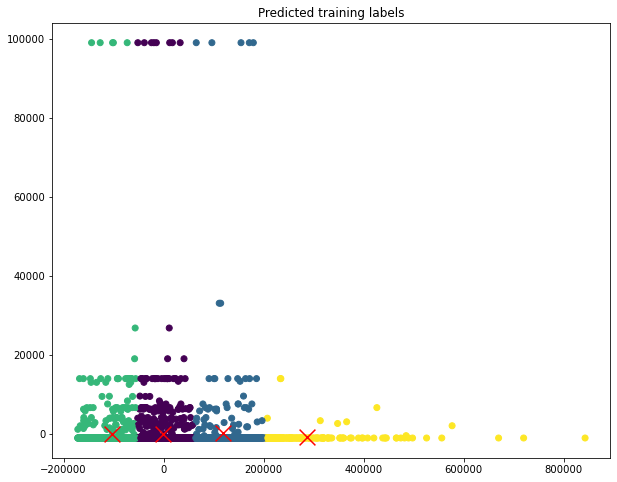

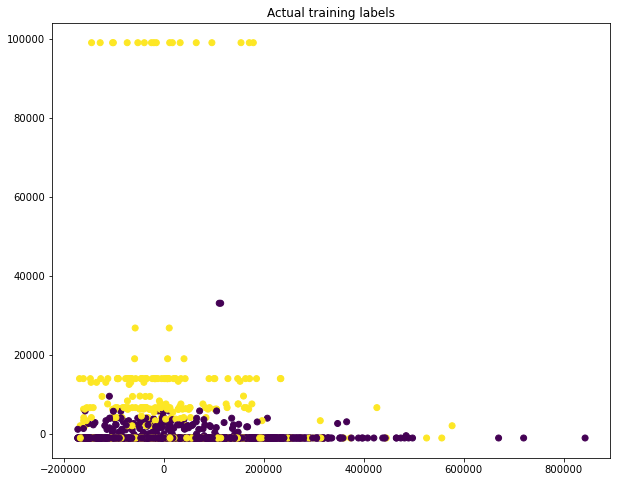

Applying pca for 4 components using the dataset and choosing k = 4 
we get the above scatter plots where cluster centers are computed for Predicted Training Labels


In [16]:

###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels
# Import PCA
from sklearn.decomposition import PCA


# Create the KMeans model
kmeans = KMeans(n_clusters=4, random_state=2021).fit(X_train)

# Compute cluster centers and predict cluster index for each sample 
index=kmeans.predict(X_train)

# Model and fit the data to the PCA model
X_train_pca = PCA(n_components=4).fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]

y_Train_Pred= kmeans.fit_predict(X_train_pca)


plt.figure(figsize=(10,8))
plt.title("Predicted training labels")
plt.scatter(x,y,c=index)


plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=250, marker='x',
            c='red',
            label='centroids')

plt.show()
plt.figure(figsize=(10,8))
plt.title("Actual training labels")
plt.scatter(x,y,c=y_train)

plt.show()

print("Applying pca for 4 components using the dataset and choosing k = 4 \nwe get the above scatter plots where cluster centers are computed for Predicted Training Labels")


###################end code for Task 1-b-2


##### Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

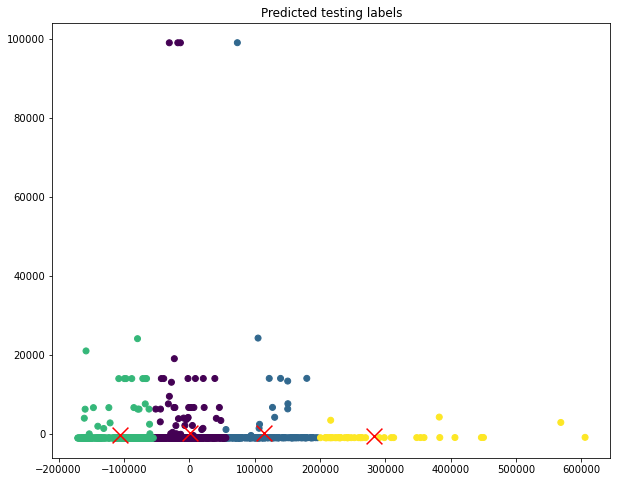

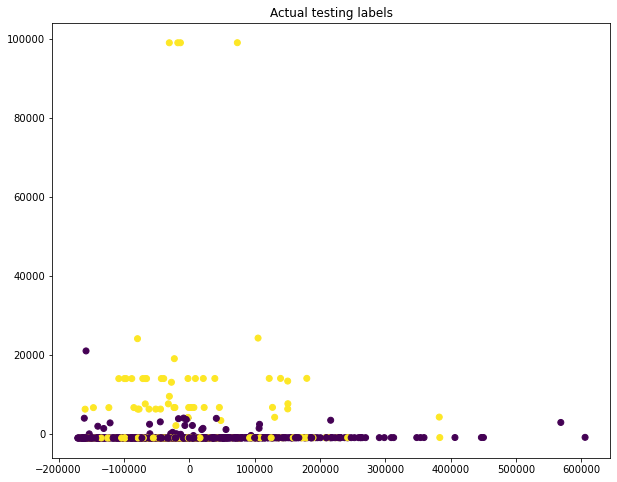

Using the Trained Model from the previous step, 

Applying pca for 4 components using the dataset and choosing k = 4 
we get the above scatter plots where cluster centers are computed for 
Predicted Testing Labels


In [17]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels

kmeans = KMeans(n_clusters=4, random_state=2021).fit(X_test)

# predict cluster index for each sample 
index1=kmeans.predict(X_test)

pca=PCA(n_components=4)

# Model and fit the data to the PCA model
X_test_pca = PCA(n_components=4).fit_transform(X_test)

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]

y_Train_Pred= kmeans.fit_predict(X_test_pca)


plt.figure(figsize=(10,8))
plt.title("Predicted testing labels")
plt.scatter(x,y,c=index1)


plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=250, marker='x',
            c='red',
            label='centroids')

plt.show()
plt.figure(figsize=(10,8))
plt.title("Actual testing labels")
plt.scatter(x,y,c=y_test)

plt.show()

print("Using the Trained Model from the previous step, \n")
print("Applying pca for 4 components using the dataset and choosing k = 4 \nwe get the above scatter plots where cluster centers are computed for \nPredicted Testing Labels")

###################end code for Task 1-b-3

##### In this step, you need to provide the evaluation of your clustering model. Print out a 2D confusion matrix.

In [18]:
###################begin code for  Print out a confusion matrix
print("Confusion matrix for training data \n",confusion_matrix(y_train,index))
print("Confusion matrix for Testing data \n",confusion_matrix(y_test,index1))

###################end code 

Confusion matrix for training data 
 [[1311  573 1004  151]
 [ 447  164  320   30]
 [   0    0    0    0]
 [   0    0    0    0]]
Confusion matrix for Testing data 
 [[329 145 228  38]
 [124  41  88   7]
 [  0   0   0   0]
 [  0   0   0   0]]


### TASK 2: Hierarchical Agglomerative Clustering
#### Task 2-a: Find the best Hierarchical Agglomerative Clustering Model
In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.

In [19]:
###################begin code for Task 2-a: Print out a confusion matrix
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score


## Calculate pairwise distance matrix for X_train
pdm_train = X_train
cosine_distance = pairwise_distances(pdm_train,metric='cosine')
euclidean_distance = pairwise_distances(pdm_train,metric='euclidean')
manhattan_distance = pairwise_distances(pdm_train,metric='manhattan')

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
cos_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(cosine_distance)
cos_comp_f1 = f1_score(y_train,cos_comp)


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
euc_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(euclidean_distance)
euc_comp_f1 = f1_score(y_train,euc_comp)


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
man_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(manhattan_distance)
man_comp_f1 = f1_score(y_train,man_comp)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
cos_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(cosine_distance)
cos_avg_f1 = f1_score(y_train,cos_avg)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
euc_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(euclidean_distance)
euc_avg_f1 = f1_score(y_train,euc_avg)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
man_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(manhattan_distance)
man_avg_f1 = f1_score(y_train,man_avg)

## Print the 2-D confusion matrix with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. 

print("F1-score for complete linkage + cosine", cos_comp_f1)
print("F1-score for complete linkage + euclidean", euc_comp_f1)
print("F1-score for complete linkage + manhattan", man_comp_f1)
print("F1-score for average linkage + cosine", cos_avg_f1)
print("F1-score for average linkage + euclidean", euc_avg_f1)
print("F1-score for average linkage + manhattan", man_avg_f1)

###################end code for Task 2-a



F1-score for complete linkage + cosine 0.3838383838383838
F1-score for complete linkage + euclidean 0.01016260162601626
F1-score for complete linkage + manhattan 0.3877175025588536
F1-score for average linkage + cosine 0.3815496661946186
F1-score for average linkage + euclidean 0.3871753246753247
F1-score for average linkage + manhattan 0.0


### Task 2-b: Visualization for Hierarchical Agglomerative Clustering
Find the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2).

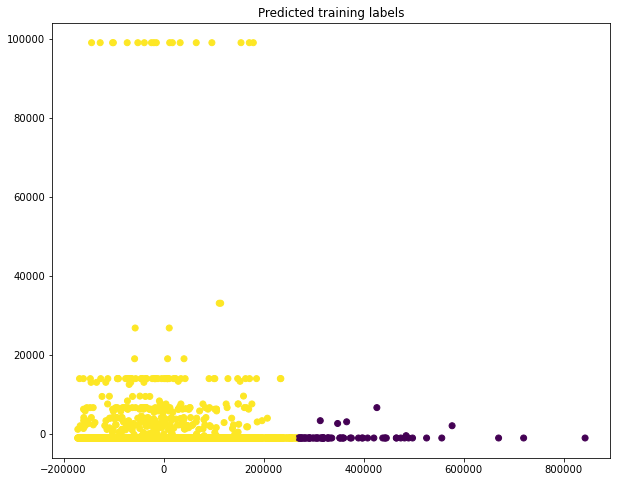

Using F1-score, we can infer that the best performing model for Hierarchical Agglomerative Clustering is with 
Complete Linkage Method and Manhattan Similarity Measure.


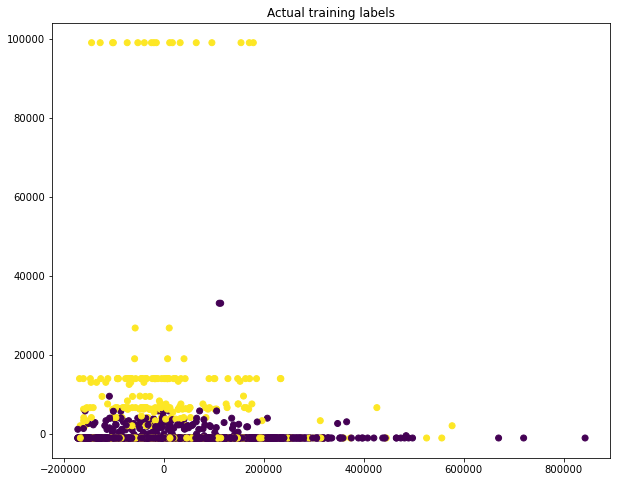

F1-score for complete linkage + manhattan 0.3877175025588536


In [20]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels
models = {'cos_comp':cos_comp_f1,'euc_comp':euc_comp_f1,'man_comp':man_comp_f1,'cos_avg':cos_avg_f1,'euc_avg':euc_avg_f1,'man_avg':man_avg_f1}
best_model_val = max(models,key=models.get)

if best_model_val == 'cos_comp':
    best_model = cos_comp

elif best_model_val == 'euc_comp':
    best_model = euc_comp

elif best_model_val == 'man_comp':
    best_model = man_comp

elif best_model_val == 'cos_avg':
    best_model = cos_avg

elif best_model_val == 'euc_avg':
    best_model = euc_avg

elif best_model_val == 'man_avg':
    best_model = man_avg

else:
    best_model = None
plt.figure(figsize=(10,8))
X_train_pca = PCA(n_components=2).fit_transform(X_train)


# Visualize the predicted training labels versus actual training labels. 
x = X_train_pca[:,0]
y = X_train_pca[:,1]
plt.scatter(x,y,c=best_model)
plt.title("Predicted training labels")
plt.show()
print("Using F1-score, we can infer that the best performing model for Hierarchical Agglomerative Clustering is with \nComplete Linkage Method and Manhattan Similarity Measure.")
plt.figure(figsize=(10,8))
plt.scatter(x,y,c=y_train)
plt.title("Actual training labels")
plt.show()
print("F1-score for complete linkage + manhattan",man_comp_f1 )

###################end code for Task 2-b

### TASK 3: Compare K-Means Clustering and Hierarchical Agglomerative Clustering
#### Task 3-a: Visualize Clusters
In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. Use number cluster = 2 for below example

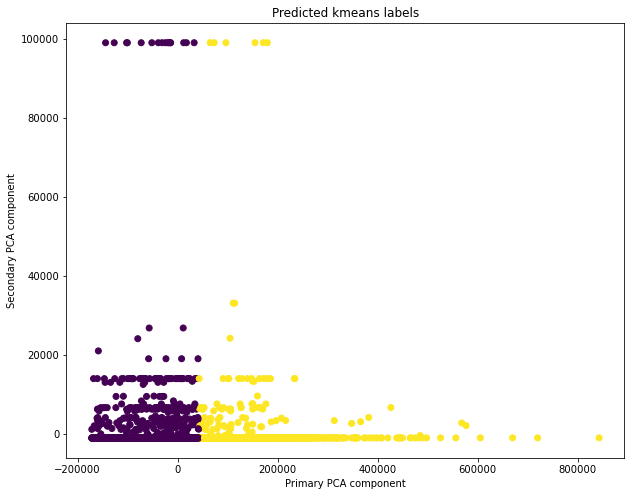

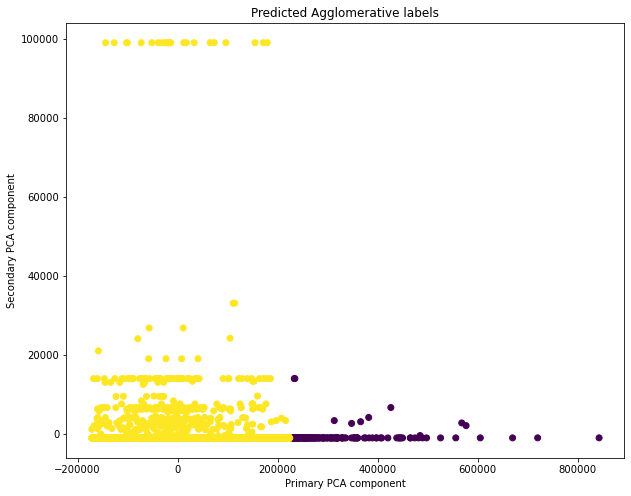

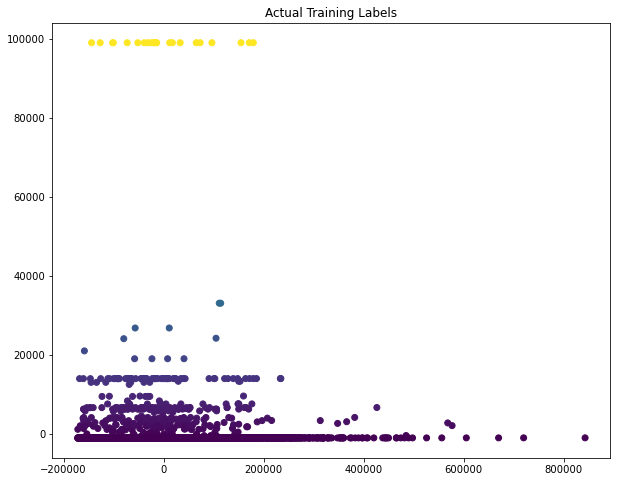

The best performing model for Hierarchical Agglomerative Clustering is with Complete Linkage Method and 
Manhattan Similarity Measure

And the scatter plots above indicate the predicted labels from k-means clustering and agglomerative clustering versus actual labels for k = 2


In [21]:
###################begin code for Task 3-a: Visualize the predicted training labels vs actual training labels

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)
X = dataset[dataset.columns[:-1]]
y = dataset[dataset.columns[-1]]

kmeans_data = KMeans(n_clusters=2,random_state=2021)
kmeans_data_fit = kmeans_data.fit_predict(X)

### Agglomerative Clustering
# Calculate pairwise distance matrix for X
cosine_distance = pairwise_distances(X,metric='cosine')
euclidean_distance = pairwise_distances(X,metric='euclidean')
manhattan_distance = pairwise_distances(X,metric='manhattan')

# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)
cos_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(cosine_distance)
cos_comp_f1 = f1_score(y,cos_comp)
euc_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(euclidean_distance)
euc_comp_f1 = f1_score(y,euc_comp)
man_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(manhattan_distance)
man_comp_f1 = f1_score(y,man_comp)
cos_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(cosine_distance)
cos_avg_f1 = f1_score(y,cos_avg)
euc_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(euclidean_distance)
euc_avg_f1 = f1_score(y,euc_avg)
man_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(manhattan_distance)
man_avg_f1 = f1_score(y,man_avg)
models = {'cos_comp':cos_comp_f1,'euc_comp':euc_comp_f1,'man_comp':man_comp_f1,'cos_avg':cos_avg_f1,'euc_avg':euc_avg_f1,'man_avg':man_avg_f1}
best_model_val = max(models,key=models.get)
if best_model_val == 'cos_comp':
    best_model = cos_comp
elif best_model_val == 'euc_comp':
    best_model = euc_comp
elif best_model_val == 'man_comp':
    best_model = man_comp
elif best_model_val == 'cos_avg':
    best_model = cos_avg   
elif best_model_val == 'euc_avg':
    best_model = euc_avg
elif best_model_val == 'man_avg':
    best_model = man_avg
else:
    best_model = None

### Visualize Clusters
#  Model and fit the data to the PCA model
X_pca = PCA(n_components=2).fit_transform(X)
x = X_pca[:,0]
y = X_pca[:,1]
plt.figure(figsize=(10,8))

# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 
plt.scatter(x,y,c=kmeans_data_fit)
plt.title("Predicted kmeans labels")
plt.xlabel("Primary PCA component")
plt.ylabel("Secondary PCA component")


plt.show()
plt.figure(figsize=(10,8))
plt.scatter(x,y,c=best_model)
plt.title("Predicted Agglomerative labels")
plt.xlabel("Primary PCA component")
plt.ylabel("Secondary PCA component")


plt.show()
plt.figure(figsize=(10,8))
plt.title("Actual Training Labels")
plt.scatter(x,y,c=y)#actual
plt.show()

print("The best performing model for Hierarchical Agglomerative Clustering is with Complete Linkage Method and \nManhattan Similarity Measure\n")
print("And the scatter plots above indicate the predicted labels from k-means clustering and agglomerative clustering versus actual labels for k = 2")

###################end code for Task 3-a

#### Task 3-b: Compare K-Means Clustering & Hierarchical Agglomerative Clustering
Print out 2D confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model in at least 3-4 lines. Type your reasoning.

In [22]:
###################begin code for Task 3-b
X = dataset[dataset.columns[:-1]]
y = dataset[dataset.columns[-1]]
print("Confusion matrix\n")
kmeans_conf = confusion_matrix(y,kmeans_data_fit)
agglo_conf = confusion_matrix(y,best_model)
print("Kmeans:")
print(kmeans_conf)
print("\nAgglomerative:")
print(agglo_conf)
print("\nPrecision")
kmeans_prec = precision_score(y,kmeans_data_fit)
agglo_prec = precision_score(y,best_model)
print("Kmeans:")
print(kmeans_prec)
print("Agglomerative:")
print(agglo_prec)
print("\nRecall")
kmeans_recall = recall_score(y,kmeans_data_fit)
agglo_recall = recall_score(y,best_model)
print("Kmeans:")
print(kmeans_recall)
print("Agglomerative:")
print(agglo_recall)
print("\nF1 Score")
kmeans_score = f1_score(y,kmeans_data_fit)
agglo_score = f1_score(y,best_model)
print("Kmeans:")
print(kmeans_score)
print("Agglomerative:")
print(agglo_score)
print("\nAccuracy of kmeans:",metrics.accuracy_score(y,kmeans_data_fit))
print("Accuracy of agglomerative :",metrics.accuracy_score(y,best_model))


###################end code for Task 3-b

Confusion matrix

Kmeans:
[[2712 1067]
 [ 927  294]]

Agglomerative:
[[ 130 3649]
 [  27 1194]]

Precision
Kmeans:
0.216017634092579
Agglomerative:
0.24654139995870328

Recall
Kmeans:
0.24078624078624078
Agglomerative:
0.9778869778869779

F1 Score
Kmeans:
0.22773044151820293
Agglomerative:
0.39379947229551454

Accuracy of kmeans: 0.6012
Accuracy of agglomerative : 0.2648


### References

1) Agglomerative clustering - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

2) PCA - https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

3) Eucledian Distance - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html

4) Manhattan Distance - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.manhattan_distances.html

5) https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

### Grading
[05 points] Follow the Rules
[45 points] Task 1:
[15 points] Task 1-a: Determine “k” value from the elbow method

[30 points] Task 1-b: Visualization for K-Means Clustering

    [05 points] Task 1-b-1: Split the dataset 

    [10 points] Task 1-b-2: Visualize the predicted training vs actual training labels 

    [10 points] Task 1-b-3: Visualize the predicted testing vs actual testing labels

    [05 points] Task 1-b-4: Print out a 2D confusion matrix
[50 points] Task 2:
[35 points] Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

[15 points] Task 2-b: Visualization for Hierarchical Agglomerative Clustering
[10 points] Task 3 (BONUS):
Task 3-a: 10 points

Task 3-b: 10 points